# Homework 2

# Pricing Diamonds


The dataset contains the following features.
- price : price of the dimaond in dollars.

- carat : weight of the diamond

- cut : quality of the cut

- color : color of the diamond, J (worst) to D (best)

- clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- x : length (mm) 

- y :  width (mm) 

- z : depth (mm) 

- depth : 2 * z / (x + y)

- table :  width of top of diamond relative to widest point



## Your job

- Try to understand the data, visualize it. You may use unsupervised learning methods at this stage.
- The main aim is then to predict, using supervised learning methods, the price of diamonds based on their different quality features.

## We want to see the following things

- Prediction results and mean squared error obtained on the test set for the methods you considered.
- A discussion about the impact of the hyperparameters of the methods on your predictions.
- A clear comparison between your solutions (a table, and/or plots comparing the results obtained with different methods).
- A discussion about the difficulties encountered if applicable.
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did efficient calibration of the methods and serious comparisons between different methods
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Hand in your assignment  before 11/11/20 23h55 :

- via Moodle for all Université de Paris students
- via email for Paris 1 students, subject [Machine Learning DM2], aurelie.fischer@univ-paris-diderot.fr


## Example of methods

Unsupervised learning methods and visualization :
- PCA
- k-means
- mixture models
- spectral clustering
...

Supervised learning methods :
- discriminant analysis
- logistic regression
- SVM
- regression trees
- bagging
- random forests
- boosting
- ...

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
import matplotlib.pyplot as plt
%matplotlib inline
# Permet a une cellule d'avoir plus d'un display en sortie
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

shuffle data, create quantitative variables, 

In [117]:
diamond_df = pd.read_csv('diamonds.csv', index_col=0)

In [93]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamond_df.shape

(53940, 10)

In [8]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
diamond_df["cut"].unique()
diamond_df["color"].unique()
diamond_df["clarity"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [17]:
# Using the pandas function to create dummy data from categorical values
# creates to many columns as it involves one-hot encoding
# It would be better to use this method as it keeps things tidy and we
# can control better the value for each characteristic

clarity_class = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
cut_class = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_class = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [27]:
# Veryfing if we have any rows with NaN values in the dataframe
diamond_df[diamond_df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [4]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [118]:
# Creation of column volume from columns x,y,z

diamond_df['volume'] = diamond_df['x']*diamond_df['y']*diamond_df['z']
# Delete this columns or leave them?? since we already have the volumne
diamond_df.drop(['x','y','z'],axis=1,inplace=True)

diamond_df = diamond_df[diamond_df['volume']<1000] 
#To delete any outlier??

# Creating categorical variables for 'cut', 'color', and 'clarity'
# We will change our method by using the previously created dicts for each of these columns
#diamond_df = pd.get_dummies(diamond_df, columns=["cut", "color", "clarity"])

diamond_df['cut'] = diamond_df['cut'].map(cut_class)
diamond_df['clarity'] = diamond_df['clarity'].map(clarity_class)
diamond_df['color'] = diamond_df['color'].map(color_class)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
1,0.23,5,6,4,61.5,55.0,326,38.202030
2,0.21,4,6,5,59.8,61.0,326,34.505856
3,0.23,2,6,7,56.9,65.0,327,38.076885
4,0.29,4,2,6,62.4,58.0,334,46.724580
5,0.31,2,1,4,63.3,58.0,335,51.917250


### All this data transformations are for us to be able to perform analytics of all variables when using unsupervised and supervised learning methods. Comparing the variables between them and obtain insight into the relationship between variables

# Data Visualization

In [38]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume,diamond score
1,0.23,1.00,0.833333,0.142857,61.5,55.0,326,38.202030,1.976190
2,0.21,0.75,0.833333,0.285714,59.8,61.0,326,34.505856,1.869048
3,0.23,0.25,0.833333,0.571429,56.9,65.0,327,38.076885,1.654762
4,0.29,0.75,0.166667,0.428571,62.4,58.0,334,46.724580,1.345238
5,0.31,0.25,0.000000,0.142857,63.3,58.0,335,51.917250,0.392857


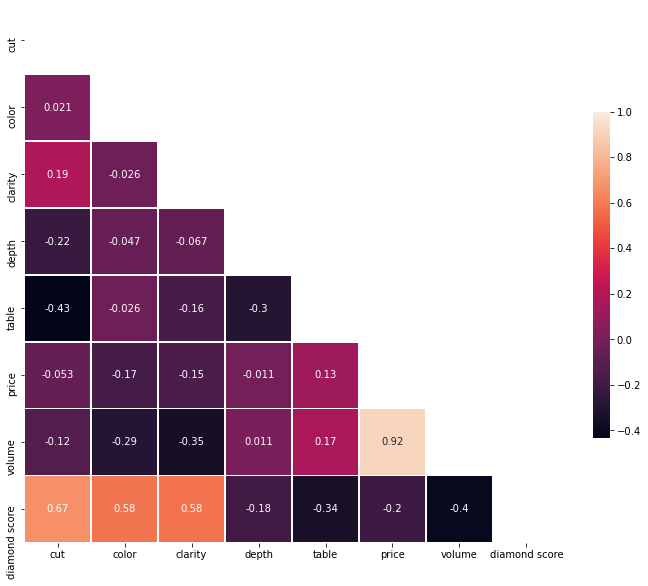

In [39]:
# Correlation between variables but with a mask for upper triangle wtf!!!

corr = diamond_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

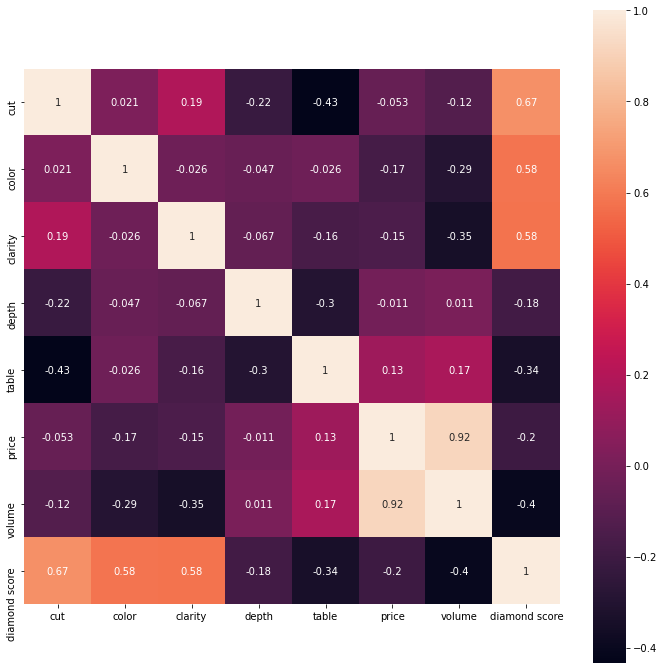

In [41]:
# WHICH ONE DO WE LIKE?? THE ONE WITH THE UPPER TRIANGLE MASKED?
plt.figure(figsize=(12, 12))
correlation = diamond_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True)

Text(0.5, 1.0, 'Distribution of Diamond Volume')

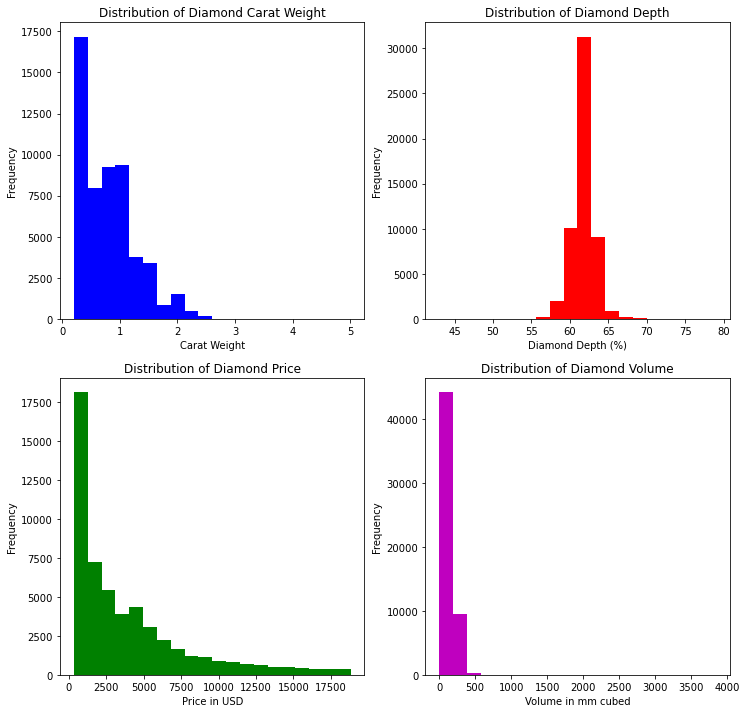

In [9]:
plt.figure(figsize=[12,12])

# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(diamond_df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(diamond_df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(diamond_df['price'],bins=20,color='g')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(diamond_df['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

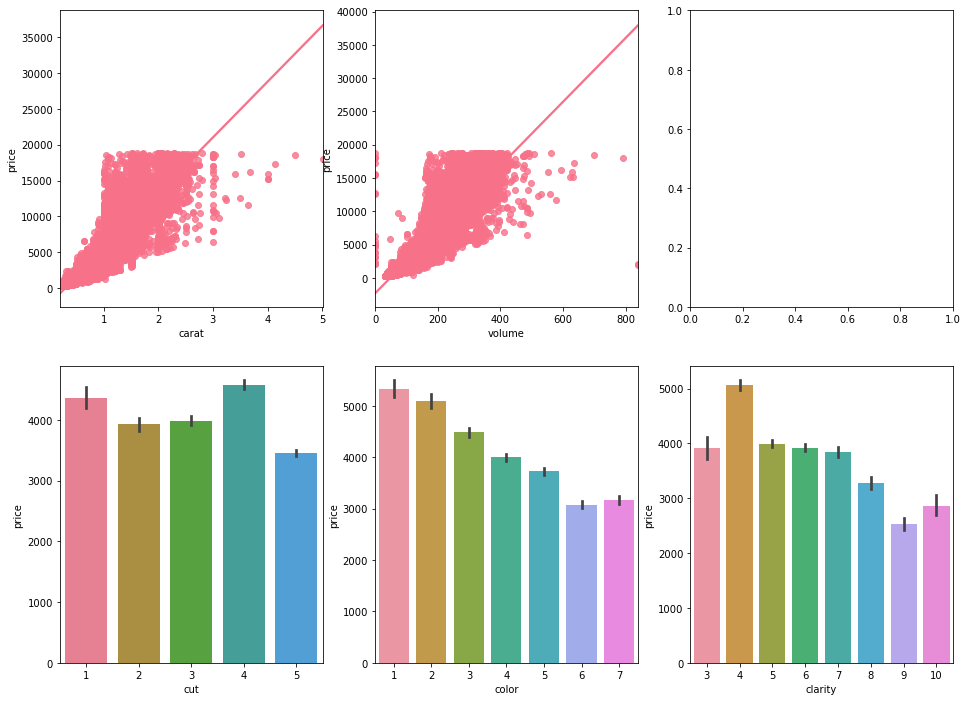

In [27]:
fig, axis = plt.subplots(2, 3,figsize=(16,12))

sns.regplot(x = 'carat', y = 'price', data=diamond_df, ax = axis[0,0])

# This is the reason we need to eliminate outliers!!
sns.regplot(x = 'volume', y = 'price', data=diamond_df, ax = axis[0,1])

# Order the plots from worst to best
#sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=diamond_df, ax = axis[1,0])
#sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=diamond_df, ax = axis[1,1])
#sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=diamond_df, ax = axis[1,2])

# Order the plots from worst to best
sns.barplot(x = 'cut', y = 'price',  data=diamond_df, ax = axis[1,0])
sns.barplot(x = 'color', y = 'price', data=diamond_df, ax = axis[1,1])
sns.barplot(x = 'clarity', y = 'price', data=diamond_df, ax = axis[1,2])

# Unsupervised learning

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [134]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume,diamond score
1,0.23,5,6,4,61.5,55.0,326,38.202030,15
2,0.21,4,6,5,59.8,61.0,326,34.505856,15
3,0.23,2,6,7,56.9,65.0,327,38.076885,15
4,0.29,4,2,6,62.4,58.0,334,46.724580,12
5,0.31,2,1,4,63.3,58.0,335,51.917250,7


We need to normalize the values of the dataset because the learning methods are very affected by the scale of values>!!

In [119]:
#scaler = MinMaxScaler()
#diamond_df[['cut','color','clarity']] = scaler.fit_transform(diamond_df[['cut','color','clarity']])

diamond_df['diamond score'] = diamond_df['cut'] + diamond_df['color'] + diamond_df['clarity']

In [135]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X = diamond_df.loc[:, features].values
# Separating out the target
y = diamond_df.loc[:,['price']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [136]:
X.shape

(53939, 7)

# SETOSA

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

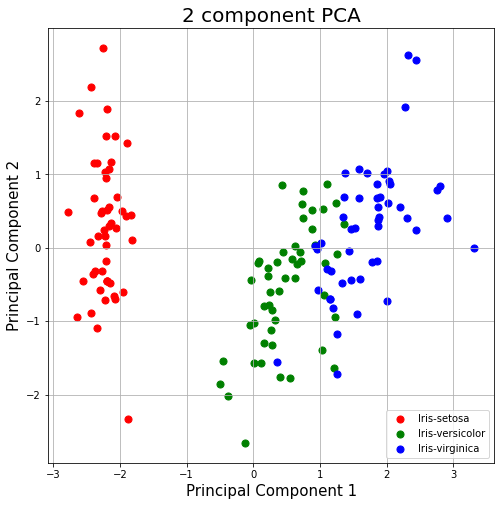

In [83]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## PCA

In [147]:
X.shape

(53939, 7)

In [154]:
pca = PCA(n_components=2)
principal_components1 = pca.fit_transform(X)


In [155]:
pca_df = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([pca_df, diamond_df[['price']]], axis = 1)

NameError: name 'principalComponents1' is not defined

In [150]:
pca_df.shape

(150, 2)

In [143]:
diamond_df.shape

(53939, 9)

In [107]:
finalDf = pd.concat([pca_df, diamond_df[['price']]], axis = 1)

In [133]:
finalDf

,principal component 1,principal component 2,price
0,-2.264542,0.505704,NaN
1,-2.086426,-0.655405,326.0
2,-2.367950,-0.318477,326.0
3,-2.304197,-0.575368,327.0
4,-2.388777,0.674767,334.0
...,...,...,...
53936,NaN,NaN,2757.0
53937,NaN,NaN,2757.0
53938,NaN,NaN,2757.0
53939,NaN,NaN,2757.0


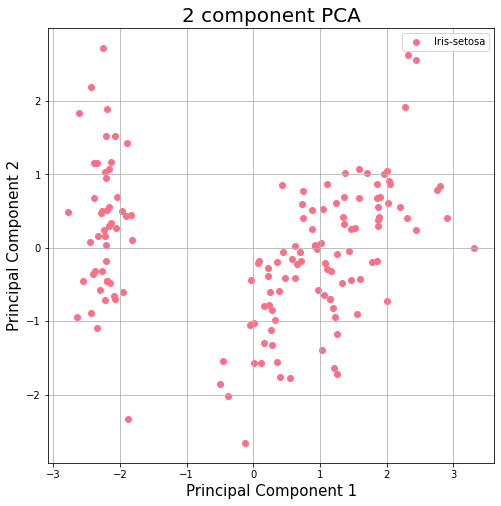

In [132]:
fig1 = plt.figure(figsize = (8,8))
ax = fig1.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


ax.scatter(data=finalDf, x='principal component 1',y='principal component 2')
ax.legend(targets)
ax.grid()

## K-Means

In [34]:
kmeans = KMeans(n_clusters=6).fit(diamond_df)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.12961302e-01 3.82128408e+00 4.55461741e+00 5.94362357e+00
  6.17648901e+01 5.75340809e+01 2.56383588e+03 1.16131463e+02]
 [1.57744200e+00 3.90868531e+00 3.93426532e+00 6.07376562e+00
  6.16616300e+01 5.78110351e+01 1.15259982e+04 2.55974518e+02]
 [1.04507703e+00 3.64728089e+00 4.13978165e+00 5.12896643e+00
  6.18322314e+01 5.79690338e+01 4.81575982e+03 1.69267981e+02]
 [1.93323214e+00 3.87098214e+00 3.71696429e+00 5.62142857e+00
  6.16268750e+01 5.79956250e+01 1.61624018e+04 3.12706552e+02]
 [1.25950977e+00 3.87208866e+00 3.98121713e+00 6.04263711e+00
  6.17771037e+01 5.76867393e+01 7.69725282e+03 2.04429329e+02]
 [3.82303360e-01 4.07293288e+00 4.69448768e+00 6.56336416e+00
  6.17236334e+01 5.70218570e+01 9.08276303e+02 6.27870730e+01]]


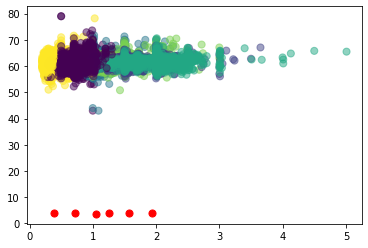

In [35]:
plt.scatter(diamond_df['carat'], diamond_df['depth'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# Supervised Learning

## Logistic Regression